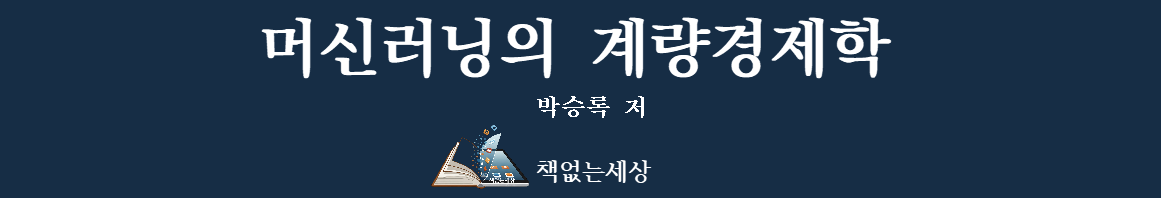

# Part 5: 정성적 선택모형, 제한 종속변수 모형

## Chapter 2: 제한 종속변수 모형

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
# exec(open('X:/Econometrics_with_ML/Functions/Traditional_Econometrics_Lib.py').read())

In [3]:
# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random
from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model
import wooldridge as woo
import wbdata
import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## 가. 토빈의 토빗(Tobit) 모형

In [4]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

mroz = woo.dataWoo('mroz')
y, X = pt.dmatrices('hours ~ nwifeinc + educ + exper +'
                    'I(exper**2)+ age + kidslt6 + kidsge6',
                    data=mroz, return_type='dataframe')

# OLS를 이용한 Tobit 모형 추정을 위한 초깃값 
reg_ols = smf.ols(formula='hours ~ nwifeinc + educ + exper + I(exper**2) +'
                          'age + kidslt6 + kidsge6', data=mroz)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)

# 함수이용(Working Directory의 하위 Functions에 Tobit.py 파일 위치필요)
exec(open("Functions/Tobit.py").read()) 
reg_tobit = Tobit(endog=y, exog=X)
results_tobit = reg_tobit.fit(start_params=params_start, maxiter=10000, disp=0)
print(results_tobit.summary())

                                Tobit Results                                 
Dep. Variable:                  hours   Log-Likelihood:                -3819.1
Model:                          Tobit   AIC:                             7656.
Method:            Maximum Likelihood   BIC:                             7698.
Date:                Mon, 18 Aug 2025                                         
Time:                        18:18:48                                         
No. Observations:                 753                                         
Df Residuals:                     745                                         
Df Model:                           7                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       965.3051    446.434      2.162      0.031      90.311    1840.299
nwifeinc         -8.8142      4.459     -1.

#### 토빗 모형의 몬테칼로 실험 사례

                                Tobit Results                                 
Dep. Variable:                      y   Log-Likelihood:                -99.698
Model:                          Tobit   AIC:                             205.4
Method:            Maximum Likelihood   BIC:                             213.2
Date:                Mon, 18 Aug 2025                                         
Time:                        18:18:48                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4484      0.776     -7.024      0.000      -6.969      -3.928
x              1.3435      0.170      7.923      0.0

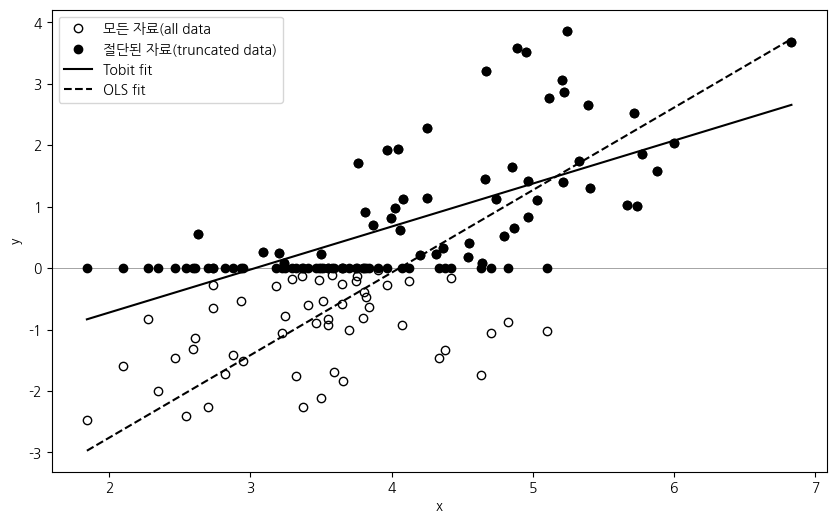

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.base.model as smclass

# random seed:
np.random.seed(1234567)

x = np.sort(stats.norm.rvs(0, 1, size=100) + 4)
xb = -4 + 1 * x
y_star = xb + stats.norm.rvs(0, 1, size=100)
y = np.copy(y_star)
y[y_star < 0] = 0

x_wc = pd.DataFrame({'const': 1, 'x': x})

# 추정 및 적합치 계산
reg_ols = sm.OLS(endog=y, exog=x_wc)
results_ols = reg_ols.fit()
yhat_ols = results_ols.fittedvalues

sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start), axis=None)

# 함수이용
exec(open("Functions/Tobit.py").read()) 
reg_tobit = Tobit(endog=y, exog=x_wc)
results_tobit = reg_tobit.fit(start_params=params_start, disp=0)
print(results_tobit.summary())
yhat_tobit = np.dot(x_wc, np.transpose(results_tobit.params[0:2]))

# 데이터와 모형별 적합치 그래프
plt.figure(figsize =(10, 6))
plt.axhline(y=0, linewidth=0.5, linestyle='-', color='grey')
plt.plot(x, y_star, color='black', marker='o', fillstyle='none',
         linestyle='', label='모든 자료(all data')
plt.plot(x, y, color='black', marker='o', fillstyle='full',
         linestyle='', label='절단된 자료(truncated data)')
plt.plot(x, yhat_ols, color='black', marker='',
         linestyle='-', label='Tobit fit')
plt.plot(x, yhat_tobit, color='black', marker='',
         linestyle='--', label='OLS fit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### 나. 절단 회귀모형

In [6]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

recid = woo.dataWoo('recid')

# 절단된 회귀모형
# 절단된 샘플 더미변수(cens변수는 절단여부를 나타내는 더미변수)
censored = recid['cens'] != 0

# 종속변수와 독립변수 행렬정의
y, X = pt.dmatrices('ldurat ~ workprg + priors + tserved + felon +'
                    'alcohol + drugs + black + married + educ + age',
                    data=recid, return_type='dataframe')

# OLS추정후 파리미터와 표준오차를 초기값으로 지정
reg_ols = smf.ols(formula='ldurat ~ workprg + priors + tserved + felon +'
                          'alcohol + drugs + black + married + educ + age',
                  data=recid)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)


# MLE 추정을 위한 클래스 정의
class CensReg(smclass.GenericLikelihoodModel):
    def __init__(self, endog, cens, exog):
        self.cens = cens
        super(smclass.GenericLikelihoodModel, self).__init__(endog, exog,
                                                             missing='none')

    def nloglikeobs(self, params):
        X = self.exog
        y = self.endog
        cens = self.cens
        p = X.shape[1]
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        ll = np.empty(len(y))
        # 검열되지 않음
        ll[~cens] = np.log(stats.norm.pdf((y - y_hat)[~cens] /
                                          sigma)) - np.log(sigma)
        # 검열됨
        ll[cens] = np.log(stats.norm.cdf(-(y - y_hat)[cens] / sigma))
        return -ll


# MLE 추정결과
reg_censReg = CensReg(endog=y, exog=X, cens=censored)
results_censReg = reg_censReg.fit(start_params=params_start,
                                  maxiter=10000, method='BFGS', disp=0)
print(results_censReg.summary())


# pytruncreg 활용을 통해서도 절단회귀모형 추정 가능
!pip install pytruncreg

                               CensReg Results                                
Dep. Variable:                 ldurat   Log-Likelihood:                -1597.1
Model:                        CensReg   AIC:                             3218.
Method:            Maximum Likelihood   BIC:                             3281.
Date:                Mon, 18 Aug 2025                                         
Time:                        18:18:49                                         
No. Observations:                1445                                         
Df Residuals:                    1434                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0994      0.348     11.796      0.000       3.418       4.781
workprg       -0.0626      0.120     -0.521      0.6

### 다. 헥크만의 선택 편의 교정모형

In [7]:

import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

# Hecket의 Sample Selection Model
mroz = woo.dataWoo('mroz')
#print(mroz)

df = mroz[['lwage', 'inlf', 'educ', 'exper', 'nwifeinc', 'age', 'kidslt6']]
y=df['lwage']
X=df[['educ', 'exper']]
X=sm.add_constant(X)
W=df[['educ', 'exper', 'nwifeinc', 'age', 'kidslt6']]
W=sm.add_constant(W)

# 1) 수식이용
# step 1: 모든 관측치를 이용한 프로빗 모형의 추정
reg_probit = smf.probit(formula='inlf ~ educ + exper +'
                                'nwifeinc + age + kidslt6',
                        data=mroz)
results_probit = reg_probit.fit(disp=0)
pred_inlf = results_probit.fittedvalues
mroz['inv_mills'] = stats.norm.pdf(pred_inlf) / stats.norm.cdf(pred_inlf)
print(results_probit.summary())
print(mroz['inv_mills'])
# step 2: y를 X와 Inverse Mill's ratio에 대해 회귀분석
reg_heckit = smf.ols(formula='lwage ~ educ + exper + inv_mills',
                     subset=(mroz['inlf'] == 1), data=mroz)
results_heckit = reg_heckit.fit()
print(results_heckit.summary())

# 2) 함수이용
exec(open("Functions/heckman.py").read()) 
res = Heckman(y, X, W).fit(method='twostep')
print(res.summary())

                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2104
Time:                        18:18:55   Log-Likelihood:                -406.54
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 7.707e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7645      0.440      1.737      0.082      -0.098       1.627
educ           0.1315      0.025      5.267      0.000       0.083       0.180
exper          0.0691      0.007      9.293      0.0